In [1]:
import warnings
warnings.filterwarnings("ignore")
import dataset_utils


In [2]:
# Step 1: Load cache

import os
from pathlib import Path
current_directory = Path.cwd()
print(current_directory)
cache_dir = current_directory / "cache_dir"
os.makedirs(cache_dir, exist_ok=True)
cache = dataset_utils.load_cache(cache_dir)


/Users/saeedomidi/Documents/Lehigh Research/Cell Images/Optogenetic recordings/pattern-recognition/Codes/python codes/neuro-decoding-ml


In [3]:
# Step 2: Fetch ophys experiment table and join cell_counts with index of experiment id
ophys_table = dataset_utils.get_ophys_table_with_cellcount(cache)

# Step 3: Select a passive experiment with cell_counts >= 100
ophys_table_filtered = dataset_utils.filter_ophys_experiments(ophys_table, passive=True, min_cell_count=100)

# Step 4: Load the experiment
ophys_exp_id = int(ophys_table_filtered.iloc[3].name)
print("Loading example ophys_experiment_id = ", ophys_exp_id)
experiment = dataset_utils.load_experiment(cache, ophys_exp_id)

# Step 5: Build structured dataset
X_trials, y = dataset_utils.build_trial_dataset(experiment)
print('X_trials shape: ', X_trials.shape)
print('y shape: ', y.shape)

Loading example ophys_experiment_id =  994955433
X_trials shape:  (4804, 280)
y shape:  (4804,)


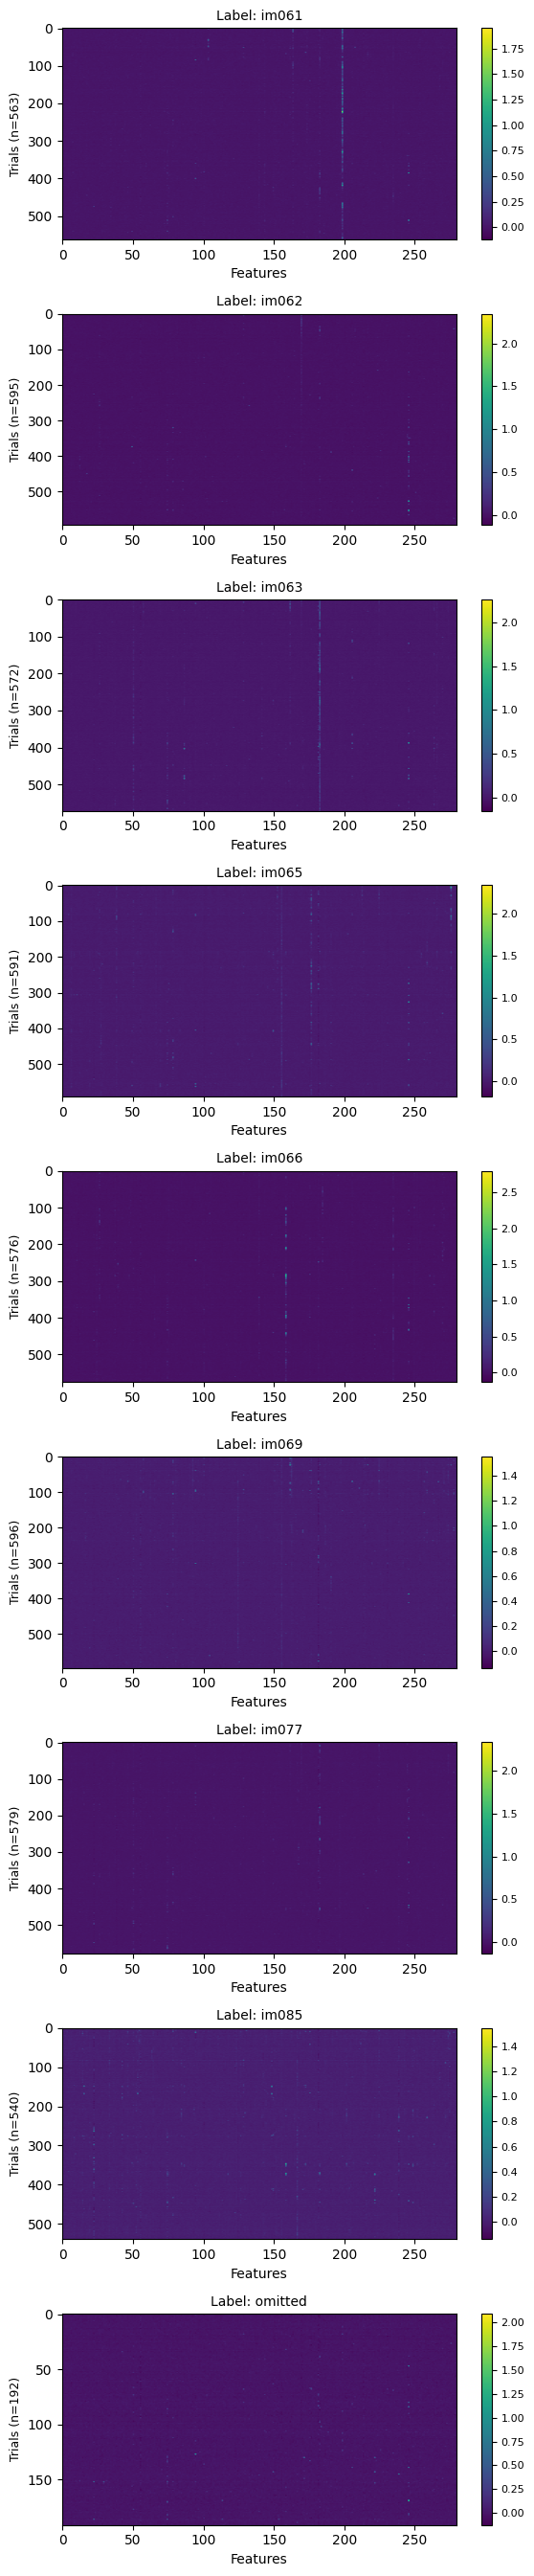

{}

In [4]:
import training_utils as tu
import visualization_utils as viz

viz.plot_heatmaps_by_label(X_trials, y)


In [5]:
results = tu.train_classifier_cv(X_trials, y)


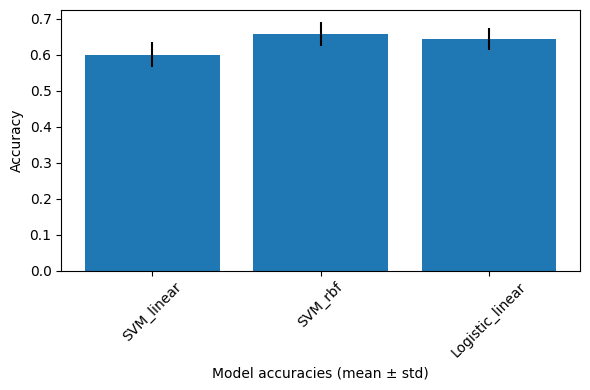

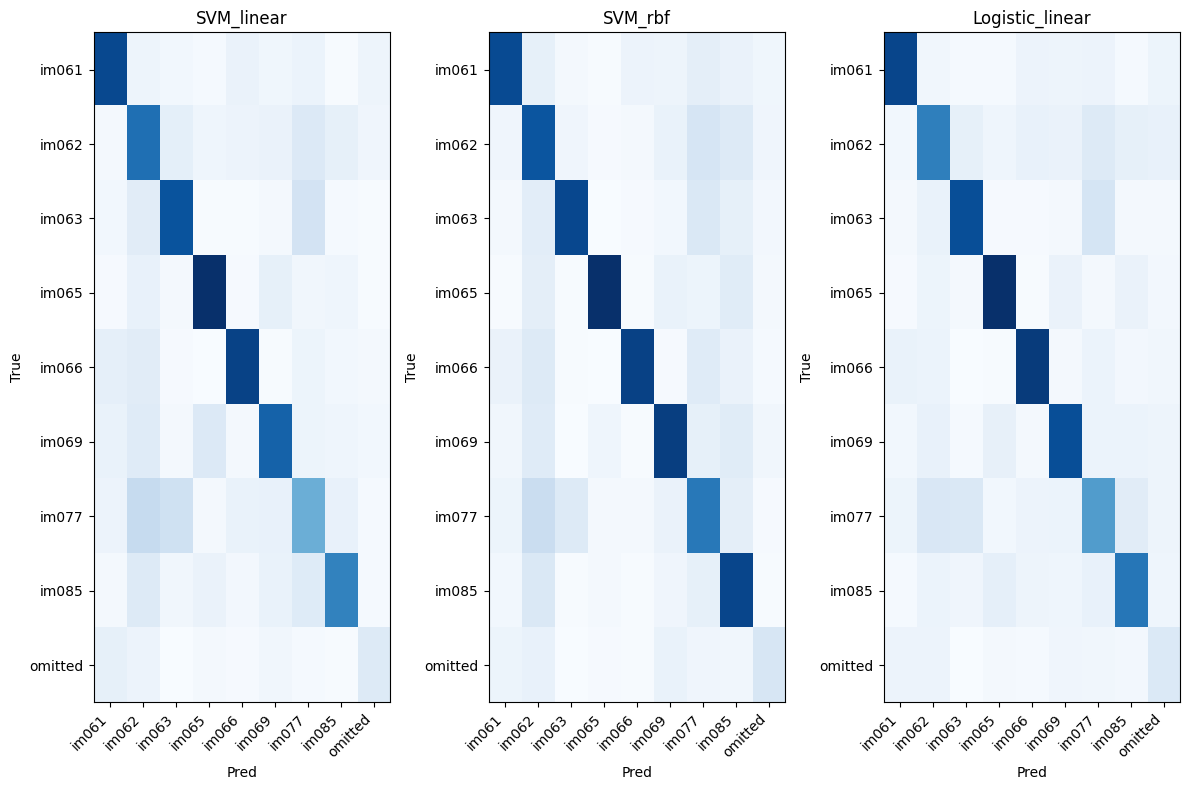

In [6]:
viz.plot_accuracy_bars(results)
viz.plot_confusion_matrix(results)
